log reg, knn, decision tree, random forest, svm, kmeans

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=5321b298e46bbaaff641bf70b23f3b526da9bbddf32e94748f79684d3524154f
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print("Shape of the data: ",data.shape)

Shape of the data:  (299, 13)


In [ ]:
print("Information about the data: ")
data.info()

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usag

In [ ]:
print("Describing the data: ")
data.describe()

Describing the data: 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
print("number of null values: ")
data.isnull().sum()

number of null values: 


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Total number of living cases:  203
Total number of deaths:  96


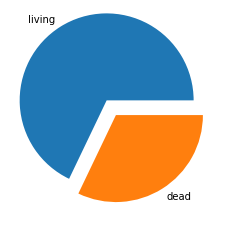

In [ ]:
len_live=len(data["DEATH_EVENT"][data.DEATH_EVENT==0])
len_death=len(data["DEATH_EVENT"][data.DEATH_EVENT==1])
arr=np.array([len_live,len_death])
labels=["living","dead"]
print("Total number of living cases: ",len_live)
print("Total number of deaths: ",len_death)
plt.pie(arr,labels=labels,explode=[0.2,0.0])
plt.show()


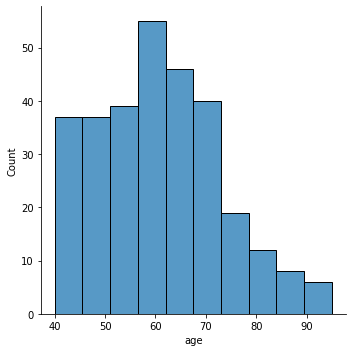

In [ ]:
sns.displot(data['age'])
plt.show()

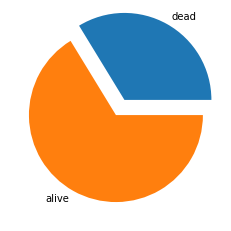

In [ ]:
above50alive=data["DEATH_EVENT"][data.age>=50][data.DEATH_EVENT==0]
above50dead=data["DEATH_EVENT"][data.age>=50][data.DEATH_EVENT==1]
arr1=np.array([len(above50dead),len(above50alive)])
plt.pie(arr1,labels=['dead','alive'],explode=[0.2,0.0])
plt.show()

<AxesSubplot:>

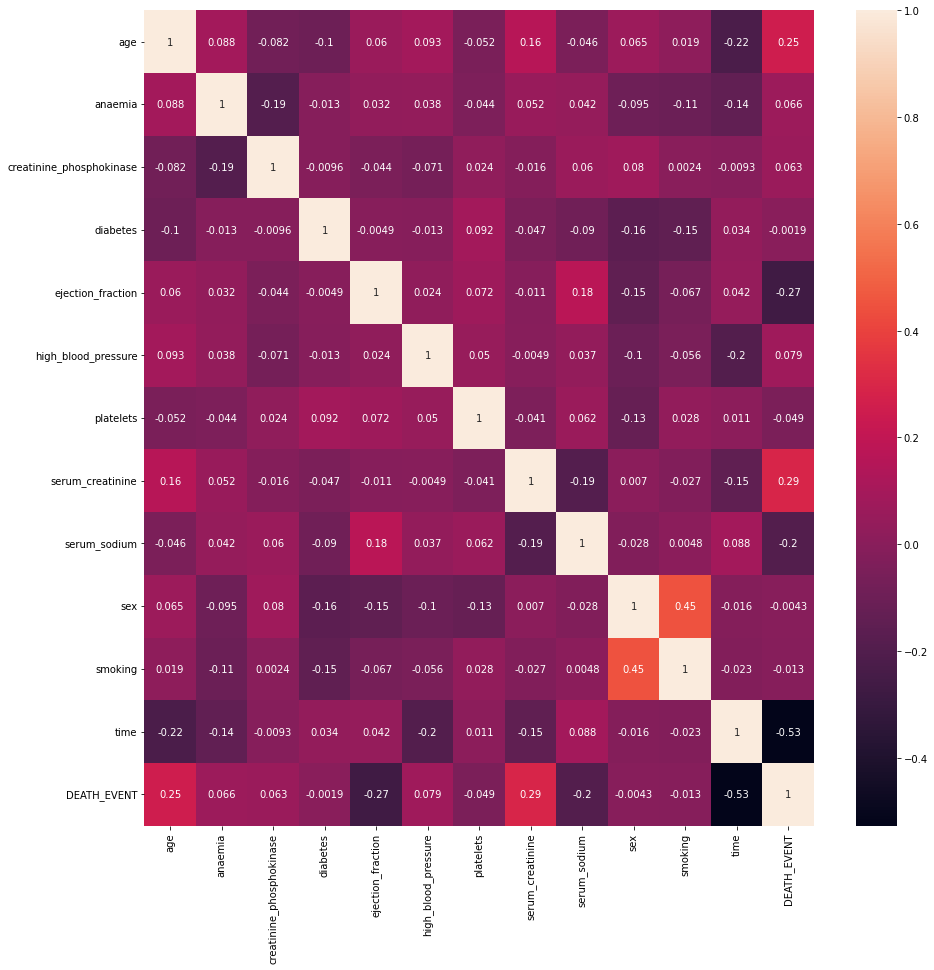

In [ ]:
corr=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("Xtrain",X_train.shape)
print("Xtest",X_test.shape)
print("ytrain",y_train.shape)
print("ytest",y_test.shape)

Xtrain (209, 12)
Xtest (90, 12)
ytrain (209,)
ytest (90,)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
print("accuracy is: ",accuracy_score(y_test,pred))

accuracy is:  0.7888888888888889


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
pred1=knn.predict(X_test)
print("accuracy is: ",accuracy_score(y_test,pred1))

accuracy is:  0.6888888888888889


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(ccp_alpha=0.01)
dt_clf.fit(X_train,y_train)
pred2=dt_clf.predict(X_test)
print("accuracy is: ",accuracy_score(y_test,pred2))

accuracy is:  0.8555555555555555


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_jobs=3,random_state=0,ccp_alpha=0.014)
rf_clf.fit(X_train,y_train)
pred3=rf_clf.predict(X_test)
print("accuracy is: ",accuracy_score(y_test,pred3))

accuracy is:  0.8888888888888888


In [ ]:
from sklearn.svm import SVC
svm_clf=SVC(kernel="linear",C=1)
svm_clf.fit(X_train,y_train)
pred4=svm_clf.predict(X_test)
print("accuracy is: ",accuracy_score(y_test,pred4))

accuracy is:  0.8
